In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import cmath
import random
import statistics
import sys
import pickle
import os
import re 
from matplotlib import colors

In [35]:
def show(img):
    f, arr = plt.subplots(1,1)
    arr.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))
    
def showgray(img):
    f, arr = plt.subplots(1,1)
    arr.imshow(img,cmap='gray')

#### Question - 1 :

###### implementation of RGB median filter

In [8]:
def medianOptimized(im,k):
    sub = np.subtract(im.shape,(k,k))
    strd = np.lib.stride_tricks.as_strided
    subM = strd(im, shape=tuple(sub)+(k,k), strides=im.strides*2)
    newimg = np.median(subM,axis=(2,3))
    return newimg 

def RGBmedian(img,k):
    h,w = img.shape[0:2]
    ret = np.zeros((h,w,3),dtype='uint8')
    b = np.zeros((h,w),dtype=np.uint8)
    g = np.zeros((h,w),dtype=np.uint8)
    r = np.zeros((h,w),dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            b[i][j] = img[i][j][0]
            g[i][j] = img[i][j][1]
            r[i][j] = img[i][j][2]

    b1 = medianOptimized(b,k)
    g1 = medianOptimized(g,k)
    r1 = medianOptimized(r,k)
    
    h1,w1 = b1.shape[0:2]
    
    for i in range(h1):
        for j in range(w1):
            ret[i][j][0] = b1[i][j]
            ret[i][j][1] = g1[i][j]
            ret[i][j][2] = r1[i][j]

    return ret

Text(0.5, 1.0, 'simba after median filter')

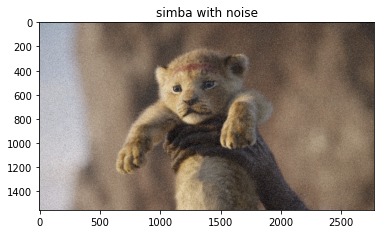

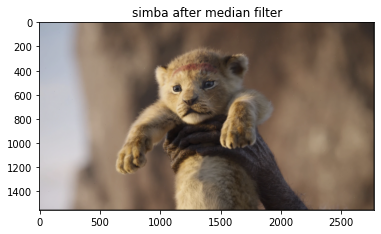

In [47]:
ns = cv2.imread('../images/NoisySimba.png')
ns3 = RGBmedian(ns,3)
show(ns)
plt.title('simba with noise')
show(ns3)
plt.title('simba after median filter')

#### implementation of colorLinContrastStreching 

In [30]:
def colorLinContrastStretching(img,a,b):
    img_copy = np.copy(img)
    maxi = np.max(img_copy)
    mini = np.min(img_copy)
    img_copy = a+(img_copy - mini)*((b-a)//(maxi-mini))
    return img_copy

Text(0.5, 1.0, 'with reduced fog after colorLinContrastStretching')

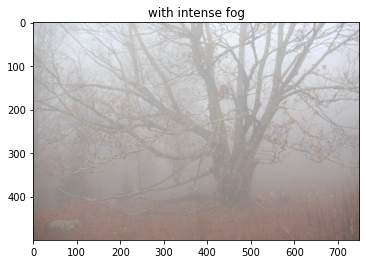

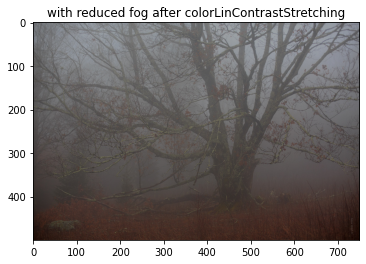

In [37]:
fog = cv2.imread('..//images/fog.jpeg')
fogRemove = colorLinContrastStretching(fog,0,255)
show(fog)
plt.title('with intense fog')
show(fogRemove)
plt.title('with reduced fog after colorLinContrastStretching')

#### implementation of histogram equilization

In [42]:
def histEqualization(img):
    img_copy = np.copy(img)

    freqB = []
    freqG = []
    freqR = []

    cdfR = np.zeros(256)
    cdfG = np.zeros(256)
    cdfB = np.zeros(256)

    x = []
    
    for i in range(256):
        freqR.append(0)
        freqG.append(0)
        freqB.append(0)
        x.append(i)
        
    row,col = img.shape[0:2]
    for i in range(row):
        for j in range(col):
            b,g,r = img[i][j]
            freqB[b] = freqB[b]+1
            freqG[g] = freqG[g]+1
            freqR[r] = freqR[r]+1

    
    cdfR[0] = freqR[0]
    cdfG[0] = freqG[0]
    cdfB[0] = freqB[0]

    
    for i in range(1,256):
        cdfR[i] = cdfR[i-1]+freqR[i]
        cdfG[i] = cdfG[i-1]+freqG[i]
        cdfB[i] = cdfB[i-1]+freqB[i]

    
    maxiR = cdfR[255]
    miniR = cdfR[0]
    
    maxiG = cdfG[255]
    miniG = cdfG[0]
    
    maxiB = cdfB[255]
    miniB = cdfB[0]

    cdfR = ((cdfR-miniR)*255.0)/(maxiR-miniR)
    cdfR = cdfR.astype('uint8')
    
    cdfG = ((cdfG-miniG)*255.0)/(maxiG-miniG)
    cdfG = cdfG.astype('uint8')    
    
    cdfB = ((cdfB-miniB)*255.0)/(maxiB-miniB)
    cdfB = cdfB.astype('uint8')
    
    for i in range(row):
        for j in range(col):
            b,g,r = img[i][j]
            img_copy[i][j][0] = cdfB[b]
            img_copy[i][j][1] = cdfG[g]
            img_copy[i][j][2] = cdfR[r]

    return img_copy

Text(0.5, 1.0, 'histogram equilized fog.jpg')

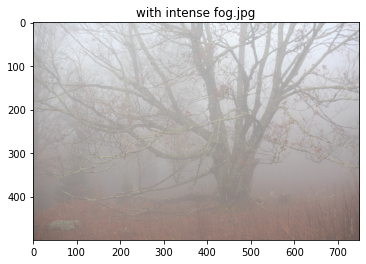

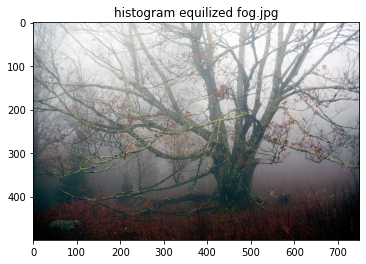

In [46]:
equilizedFog = histEqualization(fog)
show(fog)
plt.title('with intense fog.jpg')

show(equilizedFog)
plt.title('histogram equilized fog.jpg')

##### implementation of "Vintage effect" and "Matrix effect"

In [88]:
def vintage(img):
    img = np.array(img,dtype=np.float64)
    
    vin = [[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]]
    vin =np.array(vin)
    
    B=np.clip(img[:,:,0]*vin[0,0]+img[:,:,1]*vin[0,1]+img[:,:,2]*vin[0,2],0,255)
    G=np.clip(img[:,:,0]*vin[1,0]+img[:,:,1]*vin[1,1]+img[:,:,2]*vin[1,2],0,255)
    R=np.clip(img[:,:,0]*vin[2,0]+img[:,:,1]*vin[2,1]+img[:,:,2]*vin[2,2],0,255)
    
    img[:,:,0]=B
    img[:,:,1]=G
    img[:,:,2]=R
    
    img = img.astype('uint8')

    return img

Text(0.5, 1.0, 'vintage car in vintage mode')

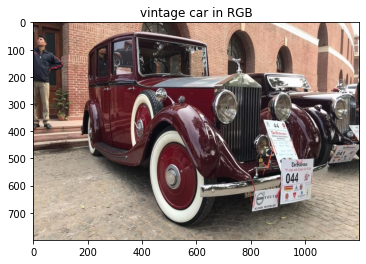

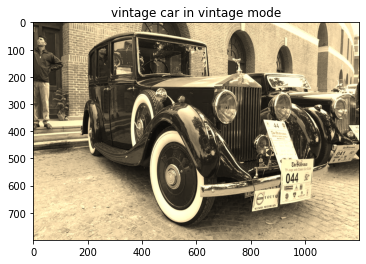

In [89]:
vint = cv2.imread('../images/vintage.jpg')
vint2 = vintage(vint)
show(vint)
plt.title('vintage car in RGB')
show(vint2)
plt.title('vintage car in vintage mode')

In [90]:
def exponential_function(channel, exp):
    table = np.array([min((i**exp), 255) for i in np.arange(0, 256)]).astype("uint8") 
    channel = cv2.LUT(channel, table)
    return channel

def tone(img, flag):
    for i in range(3):
        if i == flag:
            img[:, :, i] = exponential_function(img[:, :, i], 1.05)
        else:
            img[:, :, i] = 0 # setting values of all other slices to 0
    return img

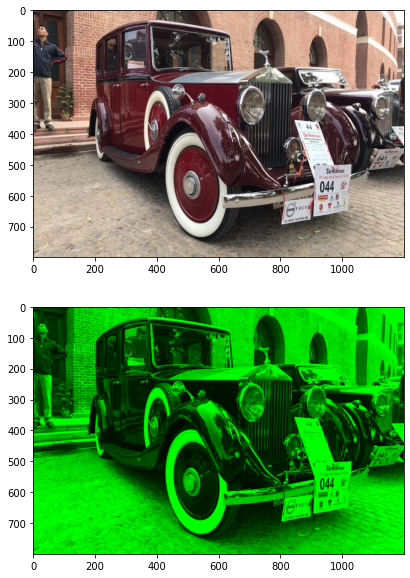

In [91]:
img = cv2.imread('../images/vintage.jpg')
original = img.copy()
img = tone(img, 1) 
# change second parameter to 0 for blue, 1 for green and 2 for red screen
fig=plt.figure(figsize=(20, 10))

fig.add_subplot(2,1,1)
og_rgb=cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(og_rgb,cmap='gray')
img_con=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig.add_subplot(2,1,2)
plt.imshow(img_con,cmap='gray')

In [83]:
def matrixEffect(img):
    im_matrix = np.copy(img)
    c = [1.5, 0.8, 1.5]
    dim = img.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            for k in range(dim[2]):
                im_matrix[i][j][k] = 255*((img[i][j][k]/255)**np.float64(c[k]))
    return im_matrix

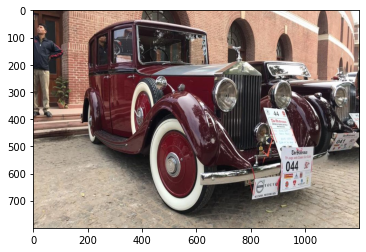

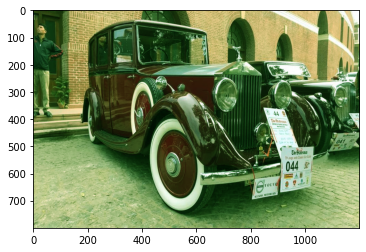

In [86]:
img = cv2.imread('../images/vintage.jpg')
img2 = matrixEffect(img)
show(img)
show(img2)

In [96]:
def vignette(img):
    im=np.copy(img)
    h,w,d=np.shape(im)
    x_g=cv2.getGaussianKernel(w,250)
    y_g=cv2.getGaussianKernel(h,200)
    
    ker=y_g*x_g.T
    mask=ker*255/np.linalg.norm(ker)
    im_out=np.zeros(np.shape(im))
    im_out[:,:,0]=im[:,:,2]*mask
    im_out[:,:,1]=im[:,:,1]*mask
    im_out[:,:,2]=im[:,:,0]*mask
    return np.clip(im_out,0,255).astype('uint8')

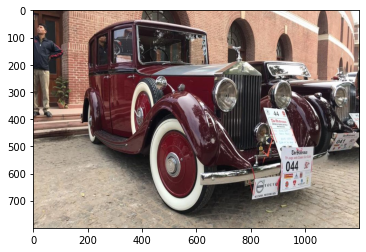

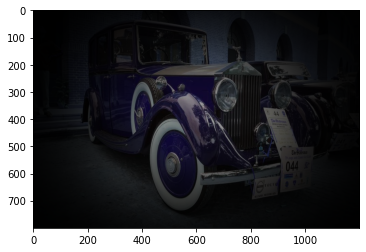

In [97]:
img = cv2.imread('../images/vintage.jpg')
img2 = vignette(img)
show(img)
show(img2)

#### Question - 2:

In [88]:
def colourise(image):
    h,w = image.shape[0:2]

    colors = []
    for i in range(300):
        colors.append([random.randint(0,255),random.randint(0,255),random.randint(0,255)])
    
    new_image = np.zeros((h, w, 3))
    for i in range(h):
        for j in range(w):
            if  image[i][j]:
                new_image[i][j] = colors[image[i][j]]
            
    new_image = new_image.astype(np.uint8)
    return new_image

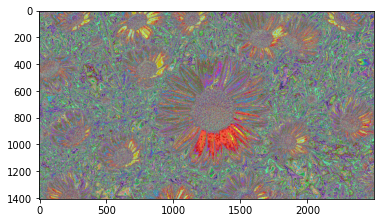

In [89]:
flower = cv2.imread('../images/flower.jpeg')
flower2 = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY) 
flow = colourise(flower2)
showgray(flow)

In [14]:
img1 = cv2.imread('../images/objects.png',cv2.IMREAD_GRAYSCALE)
img1 = img1.astype('uint8')
img1[img1>0] = 1
mat = np.ones((7,9))
extend = cv2.morphologyEx(img1,cv2.MORPH_CLOSE,mat)

In [15]:
n,m = img1.shape[0:2]
vis = np.zeros((n,m))
img2 = np.copy(img1)

sys.setrecursionlimit(100000)

def dfs(r, c,req):
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    for i in range(4):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= req.shape[0] or nc >= req.shape[1] or req[nr][nc] == 0 or vis[nr][nc] != 0:
            continue
        else :
            vis[nr][nc] = 1
            dfs(nr,nc,req)

Count of objects that have one or more holes: 6


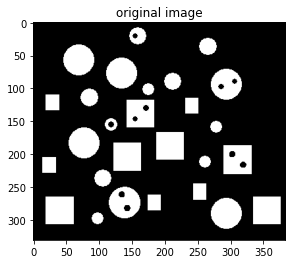

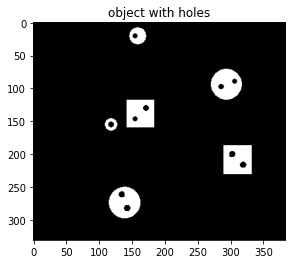

In [16]:
holes = extend - img1
holes = cv2.morphologyEx(holes, cv2.MORPH_OPEN, np.ones((3, 3)))
vis = np.zeros((n,m))
newim = np.zeros((n,m), np.uint)
c = 0
for i in range(n):
    for j in range(m):
        if holes[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            dfs(i, j, extend)
            
newim_holes = np.logical_and(vis, img1)
showgray(img1)
plt.title('original image')

showgray(newim_holes)
plt.title('object with holes')

print("Count of objects that have one or more holes: " + str(c))

Count of square objects in the image:  11


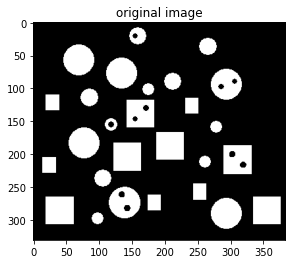

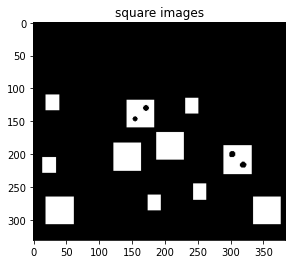

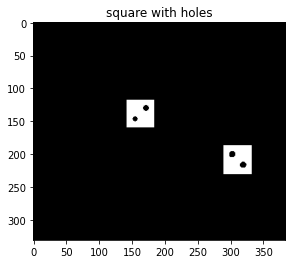

In [17]:
fil = np.array([[0, 0, 0],[1, 1, 0],[1, 1, 0]])
vis = np.zeros((n,m))
newim = np.zeros((n,m), np.uint)

def conv(im, fil):
    newim = np.copy(im)
    im = np.pad(im, (1, 1), 'constant')
    for i in range(1, im.shape[0] - 1):
        for j in range(1, im.shape[1] - 1):
            part = im[i - 1: i + 2, j - 1: j + 2]
            f = 0
            for x in range(part.shape[0]):
                for y in range(part.shape[1]):
                    if part[x][y] != fil[x][y]:
                        f = 1
            if f == 0:
                newim[i - 1, j - 1] = 1
            else:
                newim[i - 1, j - 1] = 0
    return newim

c = 0
corners = conv(img1, fil)
for i in range(n):
    for j in range(m):
        if corners[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            dfs(i, j, img1)

newim_squares = vis

newim_sqs_and_holes = np.logical_and(newim_holes, newim_squares)

showgray(img1)
plt.title('original image')

showgray(newim_squares)
plt.title('square images')

showgray(newim_sqs_and_holes)
plt.title('square with holes')

print("Count of square objects in the image: ",c)

Text(0.5, 1.0, 'circle without holes')

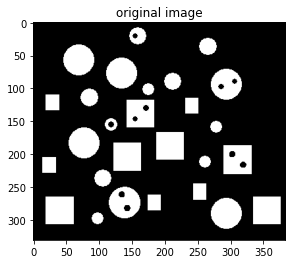

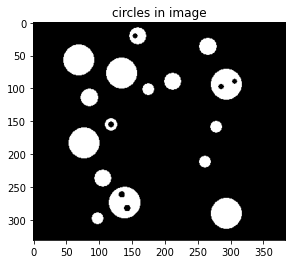

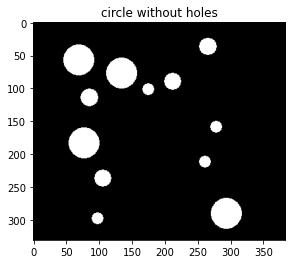

In [18]:
newim_circles = img1 - newim_squares
newim_circles_holes = np.logical_and(newim_circles, newim_holes)
newim_circles_no_holes = newim_circles - newim_circles_holes


showgray(img1)
plt.title('original image')

showgray(newim_circles)
plt.title('circles in image')

showgray(newim_circles_no_holes)
plt.title('circle without holes')

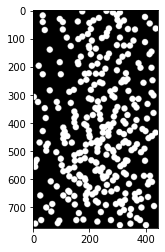

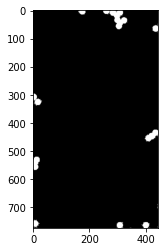

In [19]:
circles = cv2.imread('../images/circles.jpg',cv2.IMREAD_GRAYSCALE)
showgray(circles)

vis = np.zeros(circles.shape)
for i in range(circles.shape[0]):
    if circles[i][0] and vis[i][0] == 0:
        vis[i][0] = 1
        dfs(i,0,circles)
for i in range(circles.shape[1]):
    if circles[0][i] and vis[0][i] == 0:
        vis[0][i] = 1
        dfs(0,i,circles)
row,col = circles.shape
for i in range(circles.shape[1]):
    if circles[row - 1][i] and vis[row - 1][i] == 0:
        vis[row - 1][i] = 1
        dfs(row - 1,i,circles)
for i in range(circles.shape[0]):
    if circles[i][col - 1] and vis[i][col - 1] == 0:
        vis[i][col - 1] = 1
        dfs(i,col - 1,circles)
        
showgray(255*vis)

In [20]:
sys.setrecursionlimit(100000)

def dfsOverlap(r, c,col,img):
    mov1 = [-1, 0, 1, 0]
    mov2 = [0, -1, 0, 1]
    sum1 = 1
    for i in range(4):
        nr = r + mov1[i]
        nc = c + mov2[i]
        if nr < 0 or nc < 0 or nr >= img.shape[0] or nc >= img.shape[1] or img[nr][nc] == 0 or visited[nr][nc] != 0:
            continue
        else :
            # print(nr,nc)
            visited[nr][nc] = col
            sum1 = sum1 + dfsOverlap(nr,nc,col,img)
    return sum1

Text(0.5, 1.0, 'non-overlapping coins')

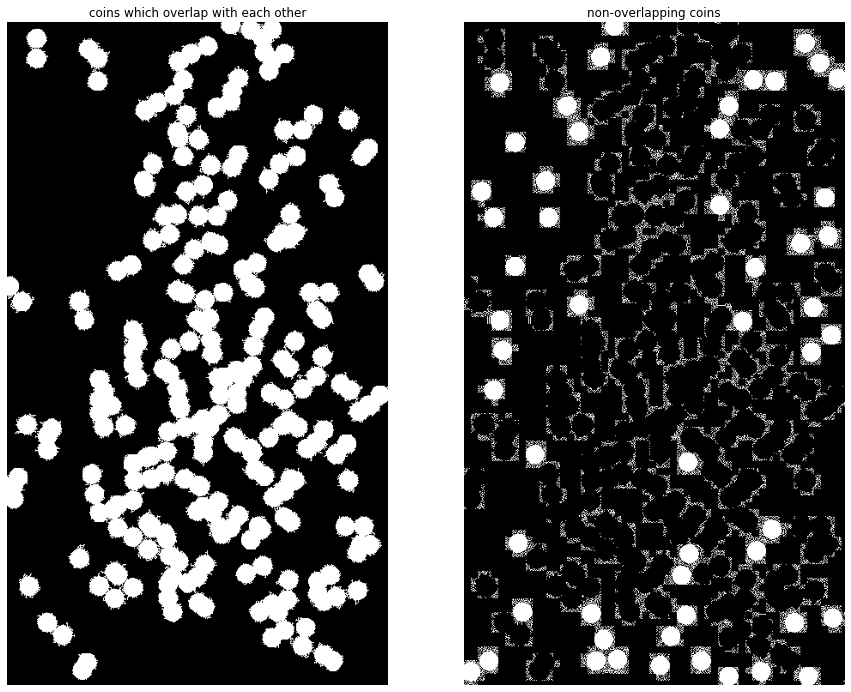

In [21]:
non_overlap_area = 450
color = 1
overlap_colors = {}
visited = np.zeros(circles.shape)

for i in range(circles.shape[0]):
    for j in range(circles.shape[1]):
        if visited[i][j] == 0 and circles[i][j] == 1:
            if dfsOverlap(i, j, color,circles) > non_overlap_area:
                overlap_colors[color] = 1
            color += 1

over = np.zeros(circles.shape)

for i in range(circles.shape[0]):
    for j in range(circles.shape[1]):
        if visited[i][j] in overlap_colors.keys():
            over[i][j] = 1

not_over = np.zeros(circles.shape)
for i in range(circles.shape[0]):
    for j in range(circles.shape[1]):
        if visited[i][j] not in overlap_colors.keys() and circles[i][j]:
            not_over[i][j] = 1

fig, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(over * 255,cmap='gray')
ax[0].axis('off')
ax[0].set_title('coins which overlap with each other')

ax[1].imshow(not_over * 255,cmap='gray')
ax[1].axis('off')
ax[1].set_title('non-overlapping coins')


#### Question - 4 :

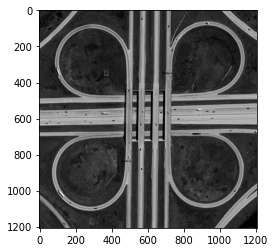

In [49]:
roads = cv2.imread("../images/roads.jpg",0)
show(roads)

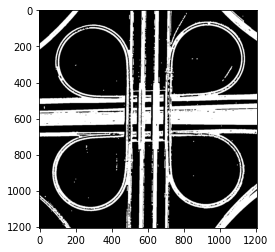

In [67]:
def NormalThresholding(img,th):
    img2 = img.copy()
    for x in range(img2.shape[0]):
        for y in range(img2.shape[1]):
            if img[x][y] >= th:
                img2[x][y] = 255
            else:
                img2[x][y] = 0
    return img2

road2 = NormalThresholding(roads,150)
kernel = np.ones((2,2),np.uint8)
road3 = cv2.dilate(road2,kernel,iterations = 3)
show(road3)

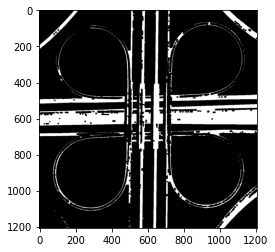

In [68]:
kernel = np.ones((4,4),np.uint8)
road4 = cv2.erode(road3,kernel,iterations = 2)
show(road4)

In [71]:
kernel = np.ones((2,2),np.uint8)
road5 = cv2.dilate(road4,kernel,iterations = 5)
road5 = cv2.medianBlur(road5,9)

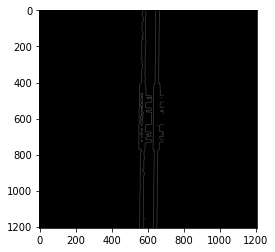

In [72]:
edges = cv2.Canny(road5,100,200)
image = np.zeros(edges.shape)
image[:,550:690] = edges[:,550:690]
plt.imshow(image,cmap='gray')
plt.show()

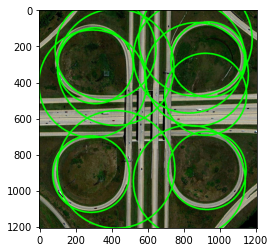

In [105]:

#road6 = cv2.medianBlur(road4,7)
kernel = np.ones((2,2),np.uint8)
road6 = cv2.dilate(road4,kernel,iterations = 8)
road6 = cv2.medianBlur(road6,7)

image = road6.copy()
image = 255- image
# output = roads.copy()
output = cv2.imread("../images/roads.jpg")
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 100,
                          param1=50, param2=30, minRadius=200, maxRadius=500)
detected_circles = np.uint16(np.around(circles))
color = (255, 0, 0)

for (x, y ,r) in detected_circles[0, :]:
    cv2.circle(output, (x, y), r, (0, 255, 0), 7)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

#### Question 5 :

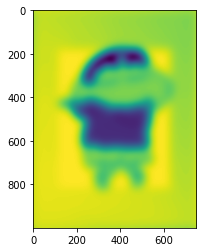

In [38]:
def fft_1D(a):
    n = a.shape[0]
    if n == 1: 
        return a 
    y_even = fft_1D(a[0::2]);
    y_odd = fft_1D(a[1::2]);
    E = [np.exp(-2j * np.pi * k/n) for k in range(int(n/2))]
    E = np.array(E)
    y = y_even + E * y_odd
    y = np.append(y, y_even - E * y_odd)
    return y

def fft_1Dt(a):
    n = a.shape[1]
    if n == 1: 
        return a 
    y_even = fft_1Dt(a[:,0::2]);
    y_odd = fft_1Dt(a[:,1::2]);
    E = [np.exp(-2j * np.pi * k/n) for k in range(int(n/2))]
    E = np.array(E)
    y = y_even + E * y_odd
    y = np.append(y, y_even - E * y_odd, axis =1)
    return y

def fft_2D(I):
    col = fft_1Dt(I)
    col = np.transpose(col)
    out = fft_1Dt(col)
    out = np.transpose(out)
    return out

def ifft_1Dt(a):
    n = a.shape[1]
    if n == 1: 
        return a 
    y_even = ifft_1Dt(a[:,0::2]);
    y_odd = ifft_1Dt(a[:,1::2]);
    E = [np.exp(2j * np.pi * k/n) for k in range(int(n/2))]
    E = np.array(E)
    y = y_even + E * y_odd
    y = np.append(y, y_even - E * y_odd, axis =1)
    return y

def ifft_2D(I):
    col = fft_1Dt(I)
    col = np.transpose(col)
    out = fft_1Dt(col)
    out = np.transpose(out)
    return out/(out.shape[0] * out.shape[1])

inputimg = cv2.imread("../images/shinchan_blur.png")
inputimg=cv2.cvtColor(inputimg,cv2.COLOR_BGR2GRAY)
plt.imshow(inputimg)

In [44]:
def psf(img, sigma):
    
    def distance(point1,point2):
        return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

    h,w = img.shape
    center = (h/2,w/2)
    mask = np.zeros_like(img, dtype=np.float32)
    for i in range(h):
        for j in range(w):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(i**2 + j**2)/(2*sigma**2))
            mask[i][j]=(1/x1)*x2
    return mask

def de_blur(sigma=1):
    shin = np.float32(inputimg)/255
    
    psf_mask = psf(shin, sigma)
    
    shinshan_fft = np.fft.fft2(shin)
    shinshan_fft = np.fft.fftshift(shinshan_fft)

    psf_fft = np.fft.fft2(psf_mask)
    psf_fft = np.fft.fftshift(psf_fft)

    result = shinshan_fft/psf_fft

    shinshan_inverse =  np.fft.ifftshift(result)
    shinshan_inverse = np.fft.ifft2(shinshan_inverse).real
    
    return shinshan_inverse #np.log(1+np.abs(psf_fft))



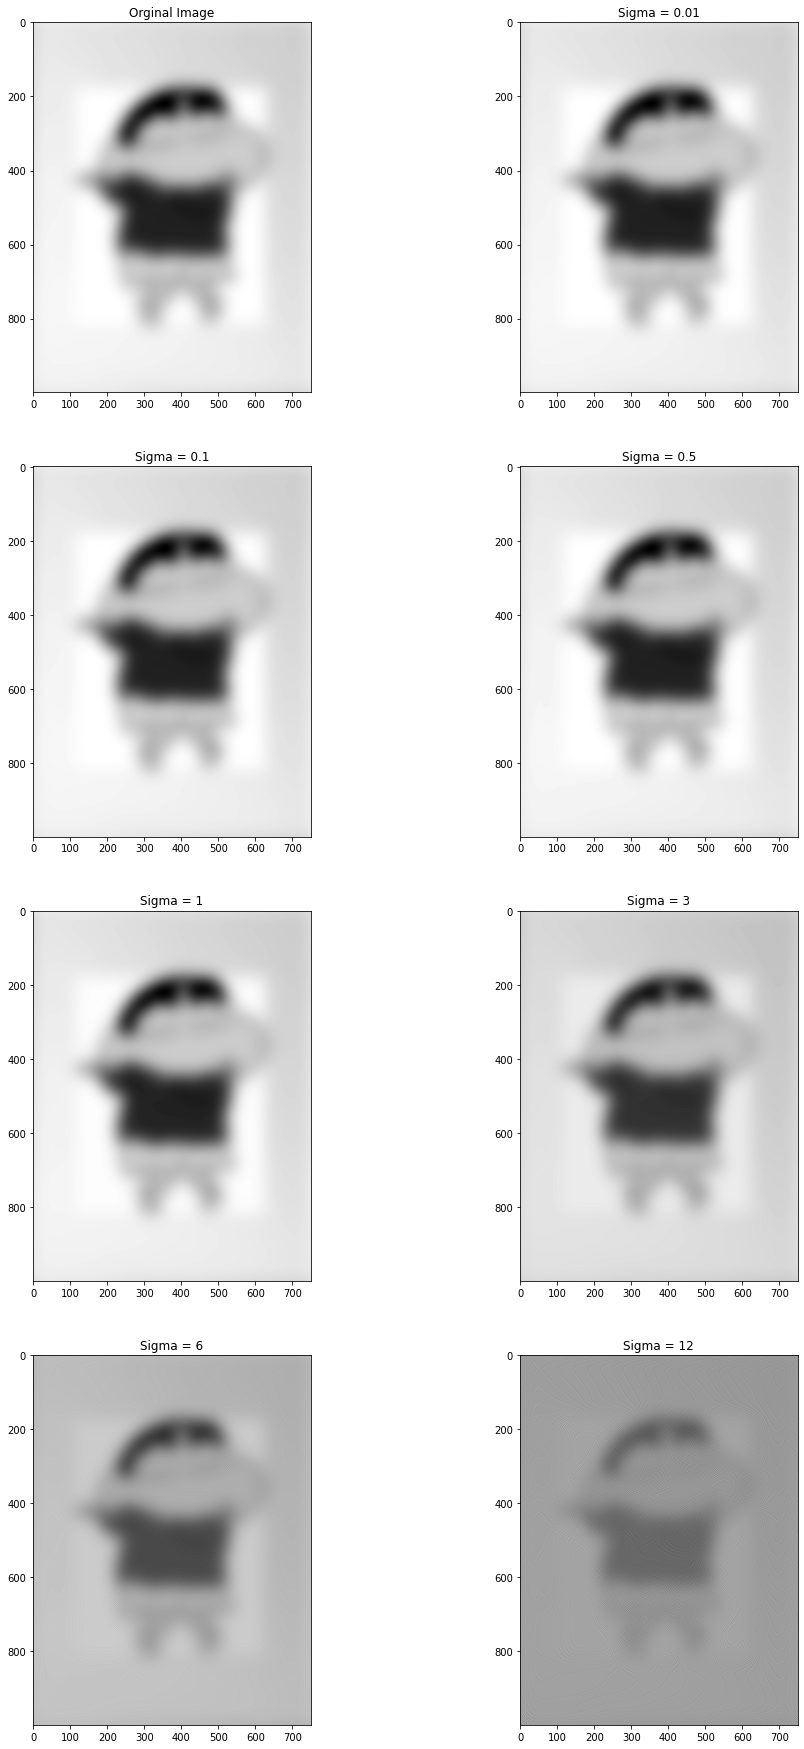

In [45]:
fig = plt.figure(figsize=(16,64))
k_list = [0.01, 0.1, 0.5, 1, 3, 6, 12]
#k_list = [ 10, 100, 500]
ax = fig.add_subplot(821)
ax.imshow(inputimg, cmap='gray')
ax.set_title("Orginal Image")
for i in range(len(k_list)):
    plot_id = 822 + i
    ax = fig.add_subplot(plot_id)
    _deblur_img = de_blur(k_list[i])
    ax.imshow(_deblur_img, cmap = 'gray')
    ax.set_title("Sigma = " + str(k_list[i]) )

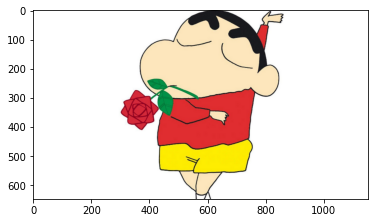

In [31]:
with open('../images/shinchan.pkl', 'rb') as f:
    data = pickle.load(f)
data=data.replace("[","")
data=data.replace("]","")
data_ar=[]
for i in data.split(','):
    data_ar.append(int(i))
data=np.array(data_ar).astype(np.uint8)
data_ar=data.reshape((648,1152,4))
plt.imshow(data_ar)

In [46]:
shape = data_ar.shape
a = data_ar
my_string = str(data_ar.tolist())
    
letters = []
only_letters = []
for letter in my_string:
    if letter not in letters:
        frequency = my_string.count(letter)             
        letters.append(frequency)
        letters.append(letter)
        only_letters.append(letter)

nodes = []
while len(letters) > 0:
    nodes.append(letters[0:2])
    letters = letters[2:]                               # sorting according to frequency
nodes.sort()
huffman_tree = []
huffman_tree.append(nodes)                             #Make each unique character as a leaf node

def combine_nodes(nodes):
    pos = 0
    newnode = []
    if len(nodes) > 1:
        nodes.sort()
        nodes[pos].append("1")                       # assigning values 1 and 0
        nodes[pos+1].append("0")
        combined_node1 = (nodes[pos] [0] + nodes[pos+1] [0])
        combined_node2 = (nodes[pos] [1] + nodes[pos+1] [1])  # combining the nodes to generate pathways
        newnode.append(combined_node1)
        newnode.append(combined_node2)
        newnodes=[]
        newnodes.append(newnode)
        newnodes = newnodes + nodes[2:]
        nodes = newnodes
        huffman_tree.append(nodes)
        combine_nodes(nodes)
    return huffman_tree                                     # huffman tree generation

newnodes = combine_nodes(nodes)

huffman_tree.sort(reverse = True)
print("Huffman tree with merged pathways:")

checklist = []
for level in huffman_tree:
    for node in level:
        if node not in checklist:
            checklist.append(node)
        else:
            level.remove(node)
count = 0
for level in huffman_tree:
    print("Level", count,":",level)             #print huffman tree
    count+=1
print()

letter_binary = []
if len(only_letters) == 1:
    lettercode = [only_letters[0], "0"]
    letter_binary.append(letter_code*len(my_string))
else:
    for letter in only_letters:
        code =""
        for node in checklist:
            if len (node)>2 and letter in node[1]:           #genrating binary code
                code = code + node[2]
        lettercode =[letter,code]
        letter_binary.append(lettercode)
print(letter_binary)
print("Binary code generated:")
for letter in letter_binary:
    print(letter[0], letter[1])

bitstring =""
for character in my_string:
    for item in letter_binary:
        if character in item:
            bitstring = bitstring + item[1]
binary ="0b"+bitstring
print("Your message as binary is:")
                                        # binary code generated

uncompressed_file_size = len(my_string)*7
compressed_file_size = len(binary)-2
print("Your original file size was", uncompressed_file_size,"bits. The compressed size is:",compressed_file_size)
print("This is a saving of ",uncompressed_file_size-compressed_file_size,"bits")
output = open("compressed.txt","w+")
print("Compressed file generated as compressed.txt")
output = open("compressed.txt","w+")
print("Decoding.......")
output.write(bitstring)

bitstring = str(binary[2:])
uncompressed_string =""
code =""
for digit in bitstring:
    code = code+digit
    pos=0                                        #iterating and decoding
    for letter in letter_binary:
        if code ==letter[1]:
            uncompressed_string=uncompressed_string+letter_binary[pos] [0]
            code=""
        pos+=1

print("Your UNCOMPRESSED data is:")
temp = re.findall(r'\d+', uncompressed_string)
res = list(map(int, temp))
res = np.array(res)
res = res.astype(np.uint8)
res = np.reshape(res, shape)
print("Input image dimensions:",shape)
print("Output image dimensions:",res.shape)

Huffman tree with merged pathways:
Level 0 : [[16161100, ' ,583079614[]2']]
Level 1 : [[5971966, ' ,', '1'], [10189134, '583079614[]2', '0']]
Level 2 : [[4831987, '5', '1'], [5357147, '83079614[]2', '0']]
Level 3 : [[2985983, ' ', '1'], [2985983, ',', '0'], [5357147, '83079614[]2', '0']]
Level 4 : [[2572925, '83079614[]', '1'], [2784222, '2', '0'], [2985983, ',', '0']]
Level 5 : [[1078635, '83079614', '1'], [1494290, '[]', '0'], [2985983, ' ', '1'], [4831987, '5', '1']]
Level 6 : [[747145, '[', '1'], [747145, ']', '0'], [2784222, '2', '0'], [2985983, ',', '0']]
Level 7 : [[442545, '83', '1'], [636090, '079614', '0'], [747145, ']', '0'], [2985983, ' ', '1'], [4831987, '5', '1']]
Level 8 : [[245116, '0796', '1'], [390974, '14', '0'], [747145, '[', '1'], [2784222, '2', '0'], [2985983, ',', '0']]
Level 9 : [[209610, '8', '1'], [232935, '3', '0'], [390974, '14', '0'], [747145, ']', '0'], [2985983, ' ', '1'], [4831987, '5', '1']]
Level 10 : [[185703, '1', '1'], [205271, '4', '0'], [232935, '

In [101]:
with open('../compressed.bin', 'w') as f:
    f.write(binary)
f.close()

print("original size was:")
print(os.path.getsize("../images/shinchan.pkl")/((2**20)),"megabytes")

print("New size is:")
print(os.path.getsize("../compressed.bin")/((2**20)*8),"megabytes")

original size was:
15.412435531616211 megabytes
New size is:
5.335824251174927 megabytes
